In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]




[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd

hbeds = pd.read_excel(r"C:\Users\Xervice5433\Downloads\Hospital_beds_global_record.xlsx", engine="openpyxl")

print(hbeds.head())

  Country Code             State                 County      Continent  \
0           AD  Andorra la Vella                Andorra         Europe   
1           AD            Encamp                Andorra         Europe   
2           AE             Dubai   United Arab Emirates           Asia   
3           AF             Kabul            Afghanistan           Asia   
4           AG           Antigua    Antigua and Barbuda  North America   

   Lateral  Levonorgestrel   Type  Measure   Beds  Population  Year  
0    42.50             1.5    ICU  1000HAB  0.071       83747  2011  
1    42.50             1.5  TOTAL  1000HAB  2.500       84463  2009  
2    24.00            54.0  TOTAL  1000HAB  1.200     9197910  2013  
3    33.00            65.0  TOTAL  1000HAB  0.500    34413603  2015  
4    17.05           -61.8  TOTAL  1000HAB  3.800       92562  2014  


In [10]:
hbeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    336 non-null    object 
 1   State           336 non-null    object 
 2   County          336 non-null    object 
 3   Continent       336 non-null    object 
 4   Lateral         336 non-null    float64
 5   Levonorgestrel  336 non-null    float64
 6   Type            336 non-null    object 
 7   Measure         336 non-null    object 
 8   Beds            336 non-null    float64
 9   Population      336 non-null    int64  
 10  Year            336 non-null    int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 29.0+ KB


In [11]:
hbeds.isnull().sum()

Country Code      0
State             0
County            0
Continent         0
Lateral           0
Levonorgestrel    0
Type              0
Measure           0
Beds              0
Population        0
Year              0
dtype: int64

In [12]:
hbeds['County'].unique()

array([' Andorra', ' United Arab Emirates', ' Afghanistan',
       ' Antigua and Barbuda', ' Albania', ' Armenia', ' Angola',
       ' Argentina', ' Austria', ' Australia', ' Azerbaijan',
       ' Bosnia and Herzegovina', ' Barbados', ' Bangladesh', ' Belgium',
       ' Burkina Faso', ' Bulgaria', ' Bahrain', ' Burundi', ' Benin',
       ' Bermuda', ' Brunei Darussalam',
       ' Plurinational State of Bolivia', ' Brazil', ' Bahamas',
       ' Bhutan', ' Botswana', ' Belarus', ' Belize', ' Canada',
       ' the Democratic Republic of the Congo',
       ' Central African Republic', ' Congo', ' Switzerland',
       " Côte d'Ivoire", ' Chile', ' Cameroon', ' China', ' Colombia',
       ' Costa Rica', ' Cuba', ' Cape Verde', ' Cyprus',
       ' Czech Republic', ' Germany', ' Djibouti', ' Denmark',
       ' Dominica', ' Dominican Republic', ' Algeria', ' Ecuador',
       ' Estonia', ' Egypt', ' Eritrea', ' Spain', ' Ethiopia',
       ' Finland', ' Fiji', ' Federated States of Micronesia', '

In [13]:
hbeds['Continent'].unique()

array(['Europe', 'Asia', 'North America', 'Africa', 'South America',
       'Oceania'], dtype=object)

In [14]:
# Q1. Which continent has highest population?
hbeds.groupby('Continent')['Population'].sum().sort_values(ascending=False)

Continent
Asia             8977365721
Europe           2291790003
North America    2208238734
Africa           1022591873
South America     658254347
Oceania            69756298
Name: Population, dtype: int64

In [15]:
# Q2. Total Beds by Country Code?
hbeds.groupby('Country Code')['Beds'].sum().sort_values(ascending=False)

Country Code
SG    38.986700
JP    23.533000
KR    20.826000
VI    18.680000
DE    15.731843
        ...    
NE     0.300000
SN     0.300000
TW     0.285000
MG     0.200000
ML     0.100000
Name: Beds, Length: 200, dtype: float64

In [16]:
# Q3. Is bed availability sufficient?
hbeds['Beds_per_1000'] = (hbeds['Beds'] / hbeds['Population']) * 1000
hbeds[['State','Beds_per_1000']].head()

,State,Beds_per_1000
0,Andorra la Vella,0.000848
1,Encamp,0.029599
2,Dubai,0.000130
3,Kabul,0.000015
4,Antigua,0.041054


In [18]:
# Q4. Top 20 States by Population Shows?
hbeds.groupby('State')['Population'].sum().sort_values(ascending=False).head(20)

State
Xinjiang         1386000000
Tibet            1386000000
Tamil Nadu       1339000000
Delhi            1339000000
Indiana           328004407
Washington        328004407
Nevada            328004407
Alabama           328004407
Wyoming           322941311
Sulawesi          264645886
Jawa              264600000
Alagoas           210147125
Punjab            207900000
Amapa             202800000
Balochistan       195306825
Khulna            159700000
Rangpur           156256276
Moscow Oblast     144496740
Abia State        135320422
Osaka             126800000
Name: Population, dtype: int64

In [19]:
# Q5. County Level Bed Distribution?
hbeds.groupby('County')['Beds'].sum().sort_values(ascending=False).head()

County
Singapore              38.986700
Japan                  23.533000
Republic of Korea      20.826000
U.S. Virgin Islands    18.680000
Germany                15.731843
Name: Beds, dtype: float64

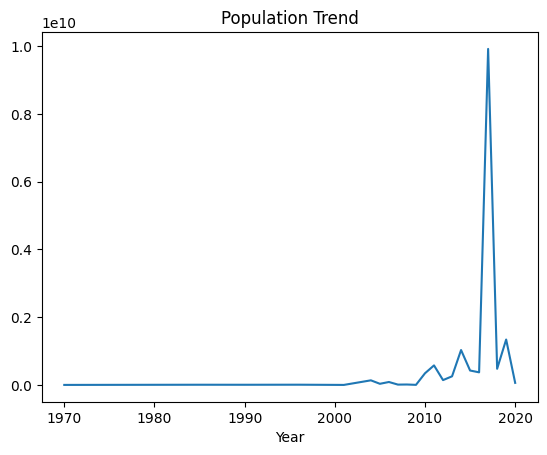

In [20]:
# Q6. Year Wise Population Growth Analysis?
hbeds.groupby('Year')['Population'].sum().plot()
plt.title("Population Trend")
plt.show()

In [23]:
# Q7. Compare metrics by healthcare measure Shows?
hbeds.groupby('Measure')[['Beds','Population']].mean()

,Beds,Population
Measure,,
1000HAB,2.505195,4.532142e+07


In [24]:
# Q8. Type Based Bed Availability Analysis?
hbeds.groupby('Type')['Beds'].sum()

Type
ACUTE          157.597540
ICU              6.027793
OTHER            0.242003
PSYCHIATRIC     58.649750
TOTAL          619.228369
Name: Beds, dtype: float64

In [25]:
# Q9. Lateral vs Levonorgestrel wise Statistical Comparison?
hbeds[['Lateral','Levonorgestrel']].describe()

,Lateral,Levonorgestrel
count,336.000000,336.00000
mean,27.876912,23.19127
std,24.663511,62.91590
min,-41.000000,-175.00000
25%,11.375000,-2.00000
50%,35.000000,19.75000
75%,47.000000,47.74500
max,72.000000,178.00000


In [26]:
# Q10. Which State has Highest Bed Density?
hbeds.groupby('State')['Beds_per_1000'].mean().sort_values(ascending=False).head()

State
Funafuti        0.590468
Denigomodu      0.499750
Monaco-Ville    0.378497
Avannaata       0.309341
Aimeliik        0.267335
Name: Beds_per_1000, dtype: float64

In [27]:
# Q11. What is total population and total beds globally?
hbeds[['Population','Beds']].sum()

Population    1.522800e+10
Beds          8.417455e+02
dtype: float64

In [28]:
# Q12. Beds per 1,000 population?
hbeds['Beds_per_1000'] = (hbeds['Beds'] / hbeds['Population']) * 1000
hbeds[['Country Code','Beds_per_1000']].head()

,Country Code,Beds_per_1000
0,AD,0.000848
1,AD,0.029599
2,AE,0.000130
3,AF,0.000015
4,AG,0.041054


In [29]:
# Q13. Top 10 Countries with Highest Beds per 1000 People?
hbeds.groupby('Country Code')['Beds_per_1000'].mean().sort_values(ascending=False).head(10)

Country Code
TV    0.590468
NR    0.499750
MC    0.378497
GL    0.309341
PW    0.267335
VI    0.172811
KY    0.118521
SM    0.118362
BM    0.104775
LI    0.063415
Name: Beds_per_1000, dtype: float64

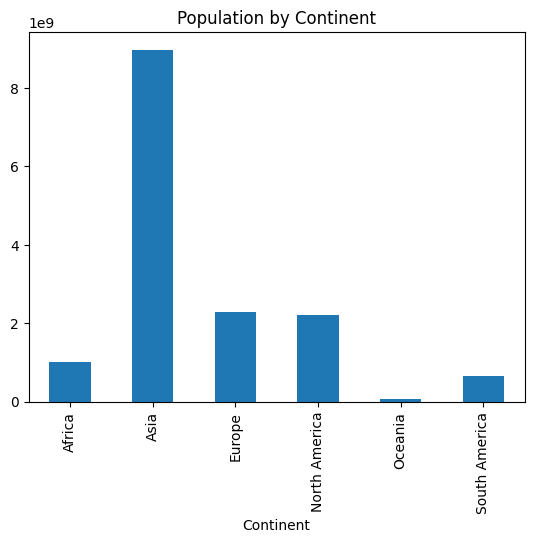

In [30]:
# Q14. Population by Continent?
hbeds.groupby('Continent')['Population'].sum().plot(kind='bar')
plt.title("Population by Continent")
plt.show()

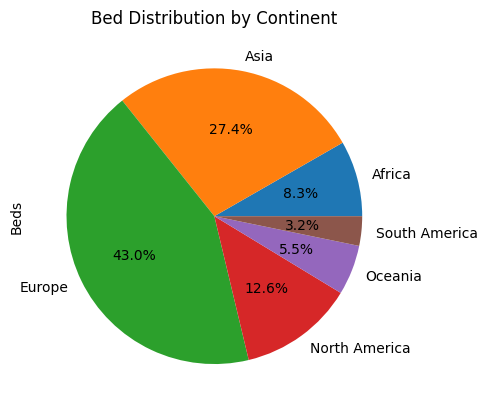

In [32]:
# Q15. Bed Distribution by Continent?
hbeds.groupby('Continent')['Beds'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title("Bed Distribution by Continent")
plt.show()

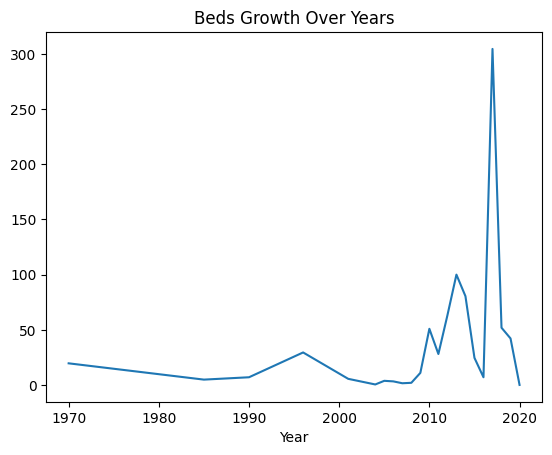

In [33]:
# Q16. Yearly Growth of Beds?
hbeds.groupby('Year')['Beds'].sum().plot()
plt.title("Beds Growth Over Years")
plt.show()

In [34]:
# Q17. States with Lowest Bed Availability?
hbeds.groupby('State')['Beds_per_1000'].mean().sort_values().head(10)

State
Delhi         1.717700e-08
Xinjiang      2.597403e-08
Khulna        4.383219e-08
Punjab        7.215007e-08
Jawa          1.020408e-07
Mon           2.060697e-07
Cebu          2.091255e-07
Oaxaca        2.404283e-07
Tamil Nadu    3.958178e-07
Tehran        5.702244e-07
Name: Beds_per_1000, dtype: float64

In [35]:
# Q18. Measure-wise Analysis (Medical Metrics)?
hbeds.groupby('Measure')['Beds'].sum()

Measure
1000HAB    841.745455
Name: Beds, dtype: float64

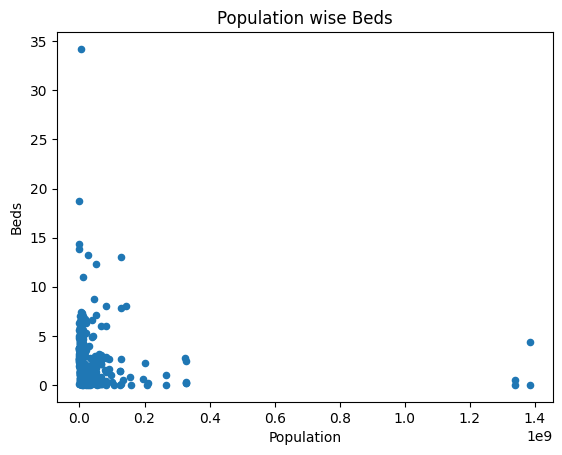

In [37]:
# Q19. Relationship Between Population and Beds?
hbeds.plot.scatter(x='Population', y='Beds')
plt.title("Population wise Beds")
plt.show()

In [38]:
# Q20. County Level wise Highest Population?
hbeds.groupby('County')['Population'].sum().sort_values(ascending=False).head(15)

County
China                2772000000
India                2678000000
United States        1634958939
Indonesia             529245886
Japan                 507157391
Brazil                412947125
Pakistan              403206825
Mexico                374331972
Germany               330146690
Bangladesh            315956276
France                265525432
United Kingdom        261196577
Turkey                243305676
Italy                 242091003
Republic of Korea     205555733
Name: Population, dtype: int64